In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import cv2

In [2]:
from keras.models import load_model
cnn=load_model('CNN_1.h5')
cnn2=load_model('CNN_2.h5')

In [3]:
import pickle

pickle_in = open("vectorized_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("vectorized_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [4]:
categories=['Bathroom','Living room']

In [5]:
y=y.reshape(-1,)

In [6]:
X.shape

(8187, 150, 150, 3)

In [7]:
cnn.predict(np.array([X[1]])).argmax()

1

# Testing the model

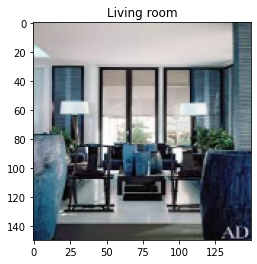

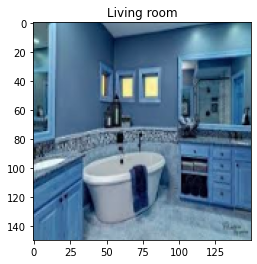

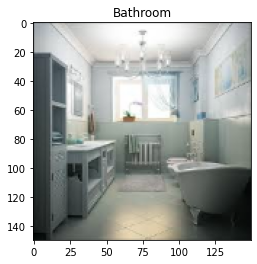

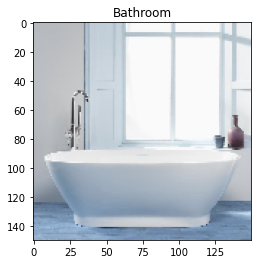

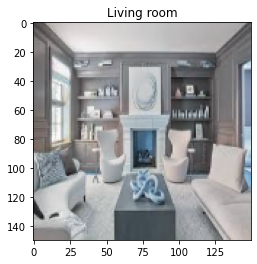

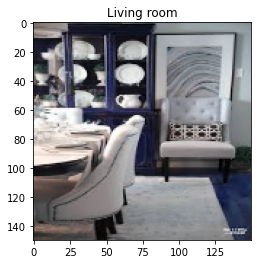

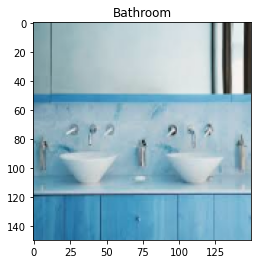

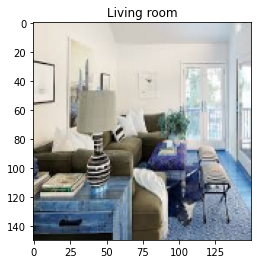

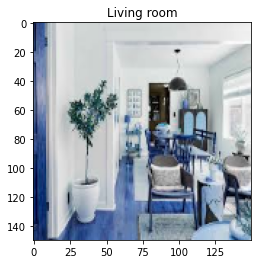

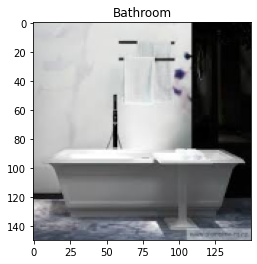

In [17]:
import random
for i in range(10):
    x=random.randint(0,8187)
    plt.imshow(X[x])
    plt.title(categories[cnn.predict(np.array([X[x]])).argmax()])
    plt.show()

# Using model to predict image on the Internet 

In [9]:
def download_image_ipg(url, file_path, file_name):
    fullpath=file_path+file_name+".png"
    urllib.request.urlretrieve(url,fullpath)

In [10]:
def predict_with_url(url,model):
    download_image_ipg(url,'image_to_predict/', 'data')
    img = cv2.imread('image_to_predict/data.png')
    new_array = cv2.resize(img, (150, 150))
    new_array=new_array/255
    categories=['Bathroom','Living room']
    predicted_label=categories[model.predict(np.array([new_array])).argmax()]
    plt.figure(figsize=(10,5))
    plt.imshow(new_array)
    plt.title("Predicted_label: "+predicted_label)
    plt.show()

In [11]:
url=['https://jumanji.livspace-cdn.com/magazine/wp-content/uploads/2019/09/16191216/Contemporary-Living-Room-Easy-Functionality.jpg',
    'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/decorating-with-antiques-peter-dunham-living-room-1582736365.png',
    'https://zsofa.vn/wp-content/uploads/2020/04/sofa-giuong-1203-2.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStRha6v5FiCLaEzTbZWhimZFFAdai2ZskOUw&usqp=CAU',
    'https://images.victoriaplum.com/blog/blogpost-covers/8263637c-99ce-4601-9c55-b758b088033a.jpg?auto=format%2Ccompress&q=55',
    'https://st.hzcdn.com/simgs/pictures/bathrooms/freiberg-drive-master-bathroom-liza-nicole-interiors-img~99c1fead0bf4c4eb_4-8824-1-863f06a.jpg',
    'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUWGBgXFhYYGRcXFRYaGBoXFhgaGhgYHSggGBslHRcWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0NFQ8PFSsZFR0rKy0rLSsrKysrLSsrKysrKy4tLTctLSsrKy0tLTctNysuMC0tKy0rLSstNy0tLTc3K//AABEIAK4BIgMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQIDAAEGB//EAEQQAAEDAgIHBQUGBAQFBQAAAAEAAhEDIQQxBRJBUWFxgQaRobHwEyIjwdEyM1Jy4fEUQmKCFVOi0gcWkqOyJCU0Q2P/xAAWAQEBAQAAAAAAAAAAAAAAAAAAAQL/xAAYEQEBAQEBAAAAAAAAAAAAAAAAEQESAv/aAAwDAQACEQMRAD8A9eAVjAoBWsWVJccPiO5orRQs7p80Pjh8R3NFaKFndPmgDrj4zuY8grW/bHNRrj4zunkFY0e+OaItxTcktIud6bYvIcilbcyI37foUEabD9e79lNuXBZUdBgA+HzKym7giCAIU/XrvVdfEBgLi0wMzaw5A9Va12685RusittblYzZWNncfL5qLS7OCMt31Ug+5zsf1O26CbBkYPq29RaCN98rnd+6kRGwnh+55KPCDOeY2RfNBEMG53fynbyU2DnsnntWNZznPPKeO63kt6szY5gbN4nbuRUeIBzPdf5+S06dxAtu9TKtERN4zWavPhfrv9Qgr6G/HLxUXwM571aeIKjqjKCd/onggrJVFTf81e5u4Ed31VT6Z6H5oBcRAF8kBU1Tv7/1TKrR2Xvvugq9HZB7/wBUUqxLeB7/ANUG4cD66plWpcD3/qgnt9eioF1ZvXr9VCkyUVWZtjyVbAg2G2v+yZ6Ab8UdfIoBh8Ez7Oj4zdtjyyKI6CtTsi+yv2H/AJvkFDECys7Lfdv/AD/IK4HJVLlcVAtV1HkLQsWwFiyr1EK1irCtYqE2OHxHc0TorJ3T5ofG/eO5orRf83T5oBqw+K7p5BSZ94Oa3VHxXdPIIaliP/UapsdcgbiiGmLGXVKw2949SnGMMAciltK5sgre26hqK6pnKwBEK8Vo/EknVrNIJyIA6GxlFaJw1Wm3UeWkfykTIG0SdmWxMwB671tqKxinqBYGTzU2NPCL+skGy4RJVTDPWY3xZXho3BV+zyEING8gZ77cYUwBsG1QZSi0C3E8f1U2tvPPv9SitTaYt+i1qnd6ifkpNynZCwjxPy/dBHV4X5/VajgpFvL6LcZoKHOubeKrrAq5zJvA2z671CoBF0A1UXy8UJVtmjXjZ9ULUagW4jJBVAmGIHAJfUCKCxI595+qpZcZ+Nyi6zEMd2XmVBOeHQJp2en+IbO426FKgcgLbt5TXs3PtmznDvIojqMSLLfZf7t/5/kFHFGxVXZnFtbRc57g0a5zPAd6uDoVFyQ4ntHrHVw9N1R2+DqjjGcc4QztC4rEXxFXVb/ltv4C3UyqjiQsUgsUV6eFbTVYVlNAnxv3juaK0Xk7p80NjfvHc0VovJ3T5oKKg+K7p5BCUcKBida93znZGv8AvXdPILQb8UfmRB+M2dUupn3kyxhy5FKw8B1xdBKsLrWrwU62ag5kXsiLiyNymAeGXrZyVb77lQKZLTsjdxkIo4FTBtPDyVNMSN0FTabSgtjZCpbGUCfX1U9Xl66Kh05W9dEFhdwy/dRNZsTA/ZLsZVMEW9dEhxWLAc0PeGtcSCd1id0DJTVda3EDWi26Ns3n5dy3UqAWK5jBYpnthqVA9rc3SDJLfG5hFYjES7YcvIJmh3TqSYFzE2W2OJ2busoHRtX3D/f5MTN1USP7fMqorJEG3rl18UFjKmq5oawOLpETGV9vMKGNxgbUpj8bnN/7esPFoSDSvaWnTrD3HH2TXF2rq/zhsZkbYF9pCKbYvHGk3WfTDWgjWdrNsCQJgbBKVV+1ODEj+Ip+I+Srw9anXBxDZ+K0EB2bbWEbDYdy817eVg7FVouS5o4z7NgQeo4h+23qFXDSwv1gDsbaTcX37V5j2i0lWcSH6obSxeHawiAQW0nVHjh72oc8+S61tVrpq64Dm1GsFO3vNcBJjPaT/YsevUimtQ+roMm+7xJhWvNsh66Iek8yZMStAhro4ZGdv6Jx2eI9s3PI332KUNN7d58f2sm3ZozXHI8siiOjxckGAg+zeiGPYXVASQ4iJtv2c00xIss7ND4bvz/IK4GdOk1ghoDQNgEDwWjXbvC3X+y7kUtYDnxWkecBYthaWVeoBW01UFbTQKMb947midF/zdPmhsb947mitF/zdPmgqf8Aeu6eQVbagNaJycrH/fO6eQQlOgf4nWMfbJFrohzjTYcil1Nw1kxxwMCOKW0wda8ILMVfKAh2AxePXREVc/W5UgjcMvBEXVWkDZ66KmfdIttUcY+BltQ4JmZtBtxsZRTWgZ3KbTabZeEclDDGRNs/WxTbOYj10QTaBuHrohIG4bSjC3gPXRBPbGwepKAXFUA4EQJ9cEldoo7Hf6W/ROK9UDMCwSurpMa4DQLyS4/Zty2mbclFA18A4CQ/j9lvDgqzRcI+Ib/0sUKum9cub7F4gkBxsIveIk9yGxD3XOqbNEQ07+WaG6dUaZiNaejfkhcYS3/7COjZ8lHRriGElsTGYjf+iuwOk/Z+1DtYa7Q0Q1xmDwFrOcb7lUzQ+BwlSq7Va/WIGtBDMgQNo4hW1tHuBMuvkfdbnPJdDV0pTOJa7W932Tm60GJL2mJjcEnxuMaKjxE31rXBDiYgi02yzFpUUsq4B4/nz/pZ9EFX0c/8QJz+wz6LpMBTpVKYfUqCmSTDCWgtAsJnbaeq3XwWG/z2j+5iRa850pXfTa9xqWaC4+4ybZ7M7IbQOL9vSZUdVa1znFopkMD3Fompq2kxI6FW9qKLzTrsDdY6rgNSXTIMQQCDnvSLsvgajThHuYWtp1MTr63uka7GBvuuvBIOQQeg0aTWtgbd9yqQ73jkFdTLSJGqeWxCU7OPVAxZ16p12a+/b/d5FJaYEXPd+iddmj8dsDYf/Eqo6zE5KPZv7t35j5BSxOSj2b+7d+c+QTA1fkUMaaJdkhy9XUeVgLFILSivTwraaqCsYgU437x3NE6L/m6fNC437x3NE6Lyd0+aCt/3zunkFNo+KPzKuofjO6eQVgd8UfmRBuNPkUtpm+Q9dEwx2Qy2+SVtmbBuf14ILajrmw7+HJRjgPXRRdmctm/gd25YMpgeuiIqxdI5wIPrchqgIkBuc5Ru4wi8RWbf7M7euWxVh/K4PrJFGYMkgS2LzH7dEUwD8I8Nqow8C0DfbiTw4KZeMrTb1kgsHACO75IJ2WQ/fLZxRcjYB66IR0jYPQ5c0AtajObB3/ol1fCNBNiOvcj67rXgcZOfclOK0oNjA+JsZ2iJuNmazuxpaMKJ295+qvo4WUBhMYZGtYTeLx3JyMSzUbA94WIiJG8nfYd6uJqFekAIKBqYSd4k7za9+SIq4hj9ZtTWAOUQfmlz8U+C2AdgdfWjIW2HzVG6+DDDYk77mx3ZobD4Yvc6CbDKTfMnbwR+k8e11BjGs98QXGADYRE7c/BQ7PYkU5LxHvAzn/K4HLmFAHjcCQ2m+4a/WE6zs5t4LkNKYtzHVWgn3GiPedJJ1eP9QXbaVxJfSotaPsF2sN2QHNcJpXAV3PrFtOQ6NU6zbxq7zb7O2EUp/wARq68axgNkiXEyGudnPAJ5oiXta50yQCRJiSAd6QVNEYnXcfZ2LHCdZmZY8AZ8QE/0MSxjQ8AGLjO/RA8YBFgOVkHTHvmwzKMo1A4SNnAjzCDZTOucs/WxUH0YTrsz9+3kfIpNTneE67On47bife8iiOsxJsodm/u3fnPkFHFMdBugdG6NNVpPtHMGtEDbYXzTB0lZ0NN4sUrdpCkPtVWDm8D5oSr2UpkHWfUJ/t+YKqp9mKIzDjzd9FUcQFtaCxRXqAVjFUCrGFApxp+I7midFn7XT5oPHH4juaK0SbO6fNBVUPxndPIIaniHfxMWjXPNXVj8Z3MeQWms+MD/AFIhrjNnIpW3PIZ+tiZY02HI+skpaTrbM/WxBa/M29BQa4ZwPXRaeDOy3rctX3N9dEQNjWfEyH1z4KVIWyGR2DhwUMWYectnLbw4LVF0jZkflwRTag2RcCRF4HdkrWb4HcNltyGwxMZN2fXcrQbTAtf1ZBMDbAv8+iEfO4CfXyRU8B6MbkODfZ+1t3NFUeyJtzjlP6hD1MFMwBPej3AXFpgxuUaIzFs9k7b7uIQL6WDO66Lo4YZxmiQNtoz+c5epVurGwIhTVww3Kn+EG5MyzPL0AtaoVC0YLhzW24Qbkz1eCpqN2iBe/HYVAvdheFkFiMDw5J05vr0ELVZCDna+D4IZmGAOWSdYinnYIIs5euiKpcRu8kCz7R5o6o202j1wQVPM2+SApo4BOuzH37csnf8AiUkZxnftTrswfjtz27/wneg67EixUOzf3bvznyCsxGSr7N/du/OfIJgblVOYrVCqyQRJEjMRI4iRC0jyQOWIB2tuHisWFeuSrGFJNKaYbTcG70r7RdqXU6Y/h9UvJEzcAGcuMwlIZ6Qf8R3NF6Gd9rp815mzTtQVfauqBxc73mnW1DvgDJdto7tDh6g+G9oNpbkR3xI4qdLBtd3xndPIKZrNFQGf5uqCrY9utGrJ3wST6t3oHFY4tcD7MzI/maBJym6VI6fE4kGBkYOfRLmvBdszXLdqe1dSiWUjRDajxI1iHCJiRqnfOe5K8L2ie9wa0MJvruBLWixJ22AEkncE6OXe1HX2euizLdePkNy59uJJGtJIibknxKZYFx1Ztn62JUi7ED4kQIOzZtU6eFbkQCNU7BtsfmqatEkgtg2y8PXNXUKeesG5RYTGYm46qg2nqzkJH0/ZWB22B66Iem7Z7toHhI2KTX2mRN+PyVBDjGwX9bkBWrxYgefPYiKpts9HklNZ4baBv9BFE0qvKJGzjbyK1h3PEuaGuiLH3Z2G8GN/RA06sRABuBxzzyV+j6pLXGAI9bvUoHreQj1wUah92bZT6sqPaTcRNx4xu4LT6sgZfuiMLuXrorWdFTTz2X+ikXXiyom4X2euig++xvrosJB2C3rcqKj9sD1xhQTi0wPXRCVm5zHd+l1Y6pwHrohcQ7gN/qyAKv09dEG4E7vXREV6guIHrol7qh3D10QaqAxs9dEEx1zbuyV1R5iYHrogGVfePNFMmv3p12aPx232O8ikNOqnPZt49s13B3kUHZ4g2UezJ+G7858gqa9YRmtdjXzRcT+M+QTA/WitqJWkeMlYokrFhofpnEl1Qk8kXojCMxGHqUyYdNnbRtB70t0s2HHmVX2f0kKT6gcYaWkn+2/korltL0jQqllUzq/hydFhG5dJ2axdQ4arVe7Wcx7A2wsxzqYgxtg58Vy/a3HhzqdSCRUGvss3Wm/Qp32ZI/gcZBBALCDnk6kR5LKu1rVwausMiGkf9IQemanuP9bQlGj9K2aXNMTE29b1PSeNe5pHs7HO8mOitZhL2pxQxOMa5ty2jTEbZc32nQD2hRXZzCBtU0AfedRrzvGtSeB5z3KWDfSa4WDNbOGuc4xaDqgnvW+yWCezSDfaB3vmrqucCNcEESJ5i2yyy0aaOJFNutmBf5p/o2sNS0G+9czRr2BEeuiZaOxplwMeui1jGui9vAAhYyrEC1hs+kWSvD44GzYOW8bOSudXO4euBC0GIxIJiRIjbP7LBizfLjfpn+iW/wASYi1uP6KLsRN7T++2EDGpXAvHDZ9PUJRicUDa3rosqVzGzvP0Sx9Y8Dwv9EHQaGxGHiKjHF05g23iwII8U8ptwpbDGDLaDPeVwOArw/V4LqMBUSkP9Snsa3uVbqDNjW9wUKZVqpFYw/8ASPBR9j/SPBESoylIoOHH4W+Ci7Cj8De4ImVElCAv4Ufgb3NVNTBg29m09Gpi4qAzQhPV0Z/+Te5iFfog/wCU3/T9V0T3KkuQjl6+hHnKkO9v1QT+zLsyNX+4QOl12LnJT2gx4pUXvP8AK0nwQjj6OLAqFmsDqnVmM4sug0MYqAxAg7ty8+0RX1je5m/zXcaFqe8ORUV0GIrJfh8ZUo2pvLROU27jZXVXJfXKBtT7WV2/aDHjiIPe23gjsP20pn7dJw4tId5wuQe5VFytSAysWiViimGmhfvXG6XrautyXcY7DF3iuG7SUCCQM4BHUSpqisRhcO4Um1XtDhSbDXGBB294Pcn/AGX0dTdQxNGgWPD2EQ14I1rQCQfdyXKdoaJOJLAJIp0wN+U/NdP/AMOME+h7ebF7SQN2q1x5LKnWB7KkNGsyCIt7Qk25BM2aDaB7+o0bZc4jxhLdIY+p7XV13R7tpIGQOQQWltIMcarQZMavirErqKeEoUtW7RrXbqt+0N4N52bUvGnMEcdToim92IbAa8g6rAQHWLnWkbgkGK7RkuY1lOWsbqy7OQALCLCy5/BY3/3eiTbW1RHJp+iaHLhq5R7pLfGFmCxQFQGANh5HjF0PWrk1KzAJipUF8pD3ADvCR1NKlt9UcBv8PXdMxNx37sQbCx9clgqiLAdy5Ch2hMXZGzu5Dgpf46XWDPXzWiOmrYkZQNmYBVftSfw9w+i5/wDxV/4W9Zt4erqTdLvJ+wzr+3Lx3KkPDUI/B62oStVjd66IP/EnfgbfLMT4cW96Wv0wbwxu05xy2cWf9ShDEY3VezmAbRnK7PRtbJeS4zS5LY1IuLgybHMC0m2/au67NaVFRjTN4uNx2jvQegUX5IgFLMDWkI0FUEtcolygHrTnqiyVElV6ywlBsuWi5VucoGogk96qc5Re9Uvegkai4T/iZpLVoCmDeo4A8m+8fENHVdfiK0BeP/8AEDSPtMUGg2ptidznXPgGoJaFqZejuXd6CdfPZ9V5zoaou+0DUlwy2+Sg6B5QOIKMcgsSgFqFVyt1SqpugGJWKBKxB3H8NLe9c/jtAMeBUcT9kWHALtKNGWpRiazBSexpBd77QBnaQOexNHL4rCNFVzoGsQ2TtgNAHkmOg/vCN7Hj/SVmMwWs8kujdl02Kej6ADx70zLSLHNp8VlS7Tr6gqk0ma592DLQ2dUbzJ6Ln24PEmpr1GGC6XZRncwDzTqnoCNjzzGVoyAHqUbhdEFoIggDdYnoqOefo/Elxii43MERGfP13pMaFSlj8O6o1zTLbEcSPmup0npA0TDi4HYNY/OEuxbfbatSo4lzfu7kkGfKwUFNWs5uMrg5GvWjrUdHyWYns7Vqvc+nTc4E7IgHMi/q/OZCi4vlrajry4hr3AnMnvT+hQrlsQ4A5BzYufzbfopikf8Ay3if8k97Z5xPrmRFtHQWJGdB0f2z58PLcuy0Vo9+qfatkg7LiLC4HXbsCfYMOaA3U90cII+Xru0jzgdnsRmMO/wN+U+gOKo/wGrMeyf4T55xPV69TxNd7TanLZ+1J8gLIZ1eo+CWxlmS0RyOZme5UcJh+z+IIMUnA5bLG+wmftOJ/tCp/wCTsTP3L9m1tvenf+FjO9enU8Gw5OJ5EW5W9WVmIwbHAa5Npi9887qQeN4nsNidSBSdrCLe7nqs4/m7lXhuxOOY7WphzDN8oN3Zid2qeS9aOCpg2JeJ2kao7rnPwTGhVeABqGBAiDPr9FR5zg8HpSm33qc2mZ4AxuzkZ5jqiaWJ0icqc3gxfJ2rv5HkvRK1V4jVZMzImCPDaga2Ie5xBpmRG+OsiD+/FByAr6Ti1AngNScj/XwjqFP22lJ/+OY3+7GY/r4+BXaUaLIkuIdukSM8jHFW18Cx8F0zFjN+9B58cZpKfuDz92Noz1+HiojG6TOVB3+n/fz7l2tXR9Nt9bWk2bLbW/birm4h1hE5DI+JCDz/ABWO0k1smg7uA2xtdffyKobpHSRAIw7r/k5568eK9KfVdqktYZ2A2B3wY8ErxtWpOs6keESRMZ7bZIOJdiNKHKgf9H+9C1q2lbk0CBzb/uXoGGpC5frMPPPfsnZyspVsBSffM5EgjWPOEHk2PGln2DHNG0iCfE2SVvZPFXJovJ2mxJ8b+ty9mfoem062seAJaOMB2aFrYl2dju2z3FB5EzQeIpmfZuE7HQO4zZdX2e16ZDqjHNA3xeRFl2PtCf5HT1jhNvqluIpVC6TTHHVJPdP02IDWPa4S0yELiaRQGGDp+y5vG9o3ggepRQxsGH94+YRIFqtQ21NajGuEi/EIDEsj1CBYVtCfxo3FYg9KxDnvESWt3CPE5/JCMwoEm4mbyPpG1Kq+PqawHtHyTGwNmSMgPUIgYWoYeajgDtDveA5kfMKKGq4BmtrDYb2AJkzcm5284V+Gw+q5jg0SHXvJM3OxPKdHVtnG0mXFX0W5/t5IAa1UNAJaSTFhFu/IZRzCoGlCRZlxFiZiTw22ysm2IqQCIB4G4ynJL5tNhFjqgDaN193iguoUDWJLmkN3kg9NWOXdzV7dHNykx09bVVQYTBGYkHZJ9bVbpI1BEPLQIBLftEnbcWHCUBFTANeNQkwDwInZMi6XDAsBMOJGwABoG2ZJ9Sg6GIfUdq67jBEFx2yc/DuTvAYdzXnXe5xOQJ1h4gR0VFeEeGSWtaJzynwzEo+rig1oIaTJysMtp4K4DkrGohUdMHINIJEkTeN4jK15VuCYahMgt2zIJ2mMuK3i7GWtaLG8DWyzmM1VUde5kXPGLdx+pRRwwYF5dly/U/stYjRjHuLsnHbb6T4rMI50RNoMeEJbjTVZOtUcZGUyM43CEFn8Cxp1SdcyRcAAbBczkRCOo4y0QIEDcfXqEqwAfVA1XuECQJgC8bjIXQUSCMriJn1wQQq4yG6zWlwJAiQI2z47EDiNKEwC0ibRNybzByOSbTfoeexV4imCCS1pOwkTfYgAwQ1yAQWxfMEHhlnYdyMGGABBkgiCDERyQVYmSCd8bo5cvHmoU67hkbmRGzIILamiWEQ0ls7RB6wIVLaApOtd++AAbCeY2+SIxNCo8N1XlucgGBwORukmKxD2GC50uJ1iLcOuSBuMfe4HG8Wm5E8JPTqt1sbDZa0ujMSAQN5kX/UKjRmtq6ziXNuPeMuB35fNHNMjggRYrH+9rOYRcbdp5247FmDIeby0kbwY3XIEEjzTmo0OEEA7L3HigcbSgAMhoOwWv+x8OMgIYjAMdGsJIycYnlMZJZjNDMMQ4gTkRrA7b+tqsqOIyMQYO+SDJn181I4hxlsnKJFnZT6/VAK4GiNUXHEQ2+0RlyUf428EbYsQL7Ymx2WVWJwNRsu9oXBu0n3o2xAt37NiVsxjtdwL3yLZgtNwBYjqgaYjEyPdbr5yJ1d+U55FJa9QAGWGM+71crpXPIAkAE7rz4CFVVZbz2+f0UHNYWp+ElpO8gtMWzRJxQyeIO/YUxdQaJhrRO0CDfklGJw0F0x9NuXJVFv8LT3N8FiWNwpO1YhH/9k=',
    'https://cdn.mos.cms.futurecdn.net/urnQmjBrp6U2nnAqzzf2gb-768-80.jpg'
    ]

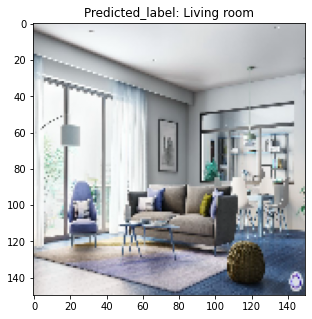

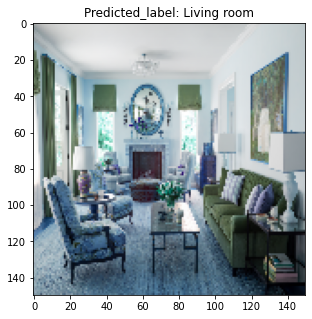

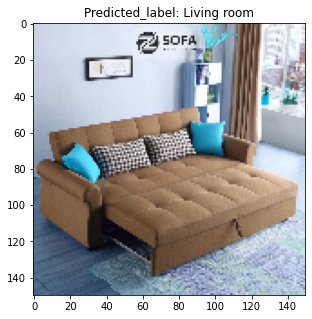

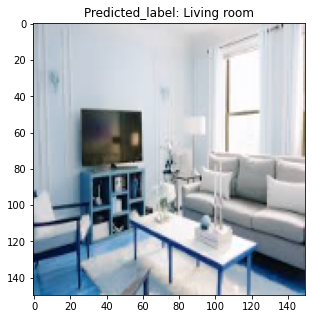

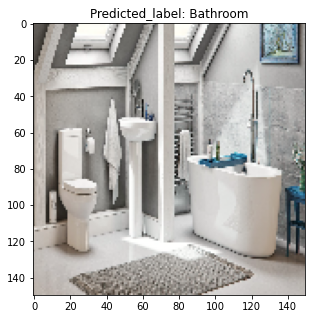

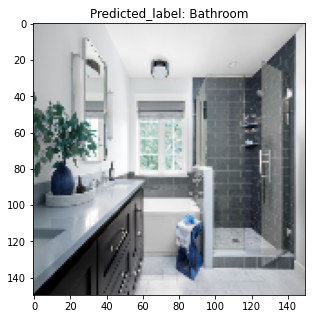

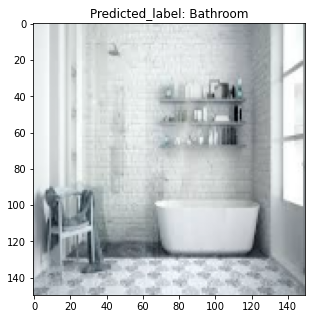

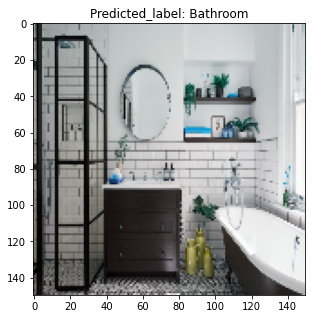

In [12]:
for i in url:
    predict_with_url(i,cnn)

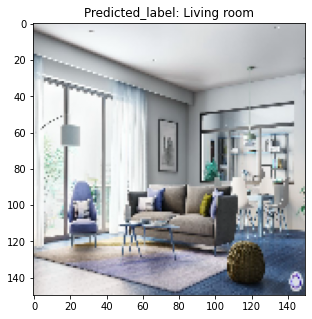

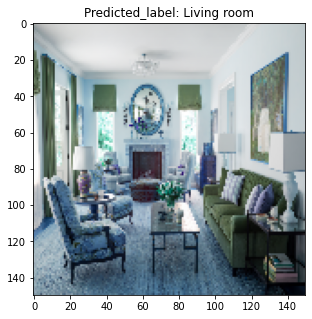

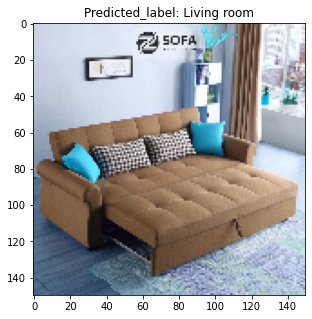

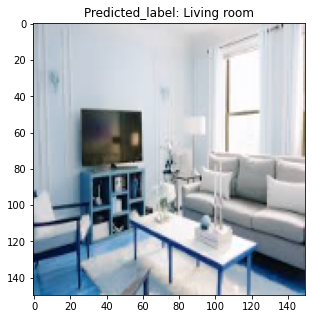

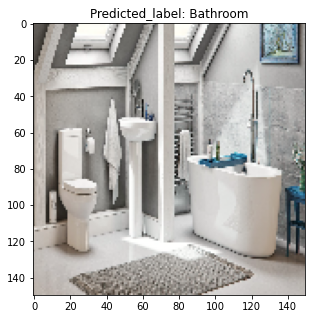

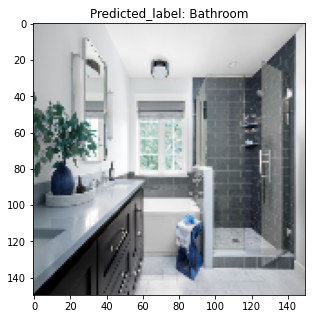

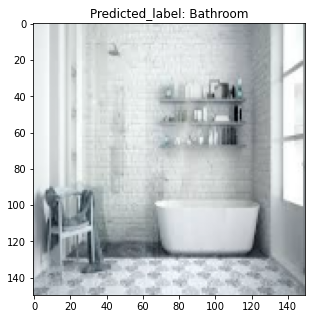

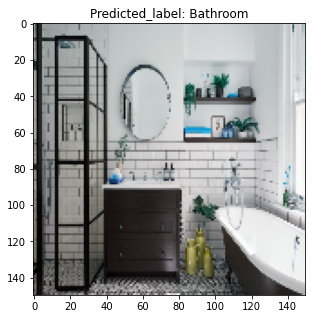

In [13]:
for i in url:
    predict_with_url(i,cnn2)